#   MATPLOTLIB

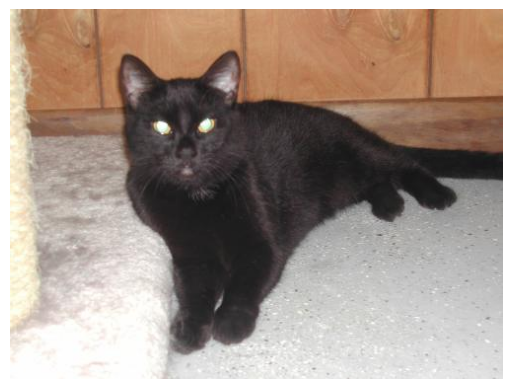

In [3]:
import matplotlib.pyplot as plt

# Read the image
image = plt.imread("Dataset/Cat/1007.jpg")  # Replace with your image file

# Display the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()


# IMAGE RECOGNITION


2025-01-30 08:43:10.362388: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-30 08:43:11.817442: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-30 08:43:12.551553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738215793.286382    4817 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738215793.452418    4817 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 08:43:15.068283: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


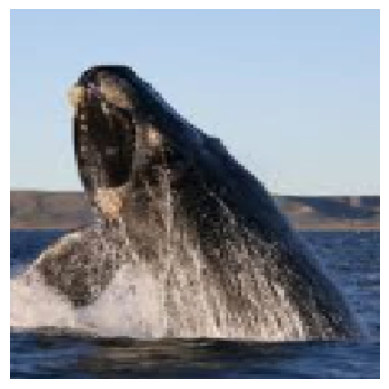

1. grey_whale (Unknown): 0.69
2. aircraft_carrier (Unknown): 0.05
3. fountain (Unknown): 0.05


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained model
model = tf.keras.applications.MobileNetV2(weights="imagenet")

# Load and preprocess image
img_path = "N.jpg"  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Predict and decode
predictions = model.predict(img_array)
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]

# Dictionary mapping common names to scientific names
scientific_names = {
    "golden retriever": "Canis lupus familiaris",
    "tabby cat": "Felis catus",
    "tiger cat": "Felis catus",
    "Persian cat": "Felis catus",
    "German shepherd": "Canis lupus familiaris",
    "African elephant": "Loxodonta africana",
    "Indian elephant": "Elephas maximus",
    "red fox": "Vulpes vulpes",
    "arctic fox": "Vulpes lagopus",
    "koala": "Phascolarctos cinereus",
    "zebra": "Equus quagga",
}

# Display image
plt.imshow(img)
plt.axis("off")
plt.show()

# Print classification results with scientific names
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    sci_name = scientific_names.get(label, "Unknown")  # Get scientific name or "Unknown"
    print(f"{i+1}. {label} ({sci_name}): {score:.2f}")


In [9]:
import tensorflow as tf
print(tf.__version__)



2.18.0


# TENSORFLOW


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to your dataset
dataset_dir = "Dataset"  # Change this to your actual dataset path

# Data Augmentation & Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2  # 80% training, 20% validation
)

# Load Training Data
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Load Validation Data
val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1420 images belonging to 2 classes.
Found 354 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2025-01-29 14:06:56.451966: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2025-01-29 14:06:56.623163: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8894 - loss: 0.4610 - val_accuracy: 0.8983 - val_loss: 0.3515
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8855 - loss: 0.3542 - val_accuracy: 0.8983 - val_loss: 0.3276
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8867 - loss: 0.3446 - val_accuracy: 0.9011 - val_loss: 0.3084
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.8955 - loss: 0.2904 - val_accuracy: 0.9040 - val_loss: 0.2959
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8983 - loss: 0.2723 - val_accuracy: 0.8983 - val_loss: 0.3246
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9190 - loss: 0.2222 - val_accuracy: 0.8814 - val_loss: 0.3075
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9302 - loss: 0.1827 - val_accuracy: 0.8983 - val_loss: 0.3618
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9484 - loss: 0.1342 - val_accuracy: 0.8842 - val_lo

In [10]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.8691 - loss: 0.7121
Validation Accuracy: 88.42%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


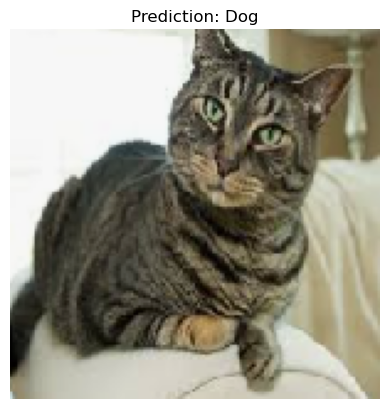

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = "fgh.png"  # Change this to your test image path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
label = "Dog" if prediction[0][0] > 0.5 else "Cat"

# Show the image
plt.imshow(img)
plt.title(f"Prediction: {label}")
plt.axis("off")  # Hide axes
plt.show()
